In [1]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

In [33]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)
lB=np.sqrt(hbar/(elec*B))

ky_sw=np.linspace(-12,6,140)/lB


Ld=6*lB
Lx=6*lB
Nx=100
kx=2*pi*np.arange(Nx)/(2*Lx)-pi*Nx/(2*Lx)
[k1,k2]=2*pi*np.mgrid[range(Nx),range(Nx)]/(2*Lx)-pi*Nx/(2*Lx)

def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= (2*k*np.cos(k*Ld)+(-2+k**2 * Ld**2)*np.sin(k*Ld))/ (k**3) /Lx
        c[ ~ np.isfinite( c )] = Ld**3 /(3*Lx)
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 1j*(-k*Ld*np.cos(k*Ld)+np.sin(k*Ld))/ (k**2) /Lx
        c[ ~ np.isfinite( c )] = Ld**2/(2*Lx)
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.sin(k*Ld)/(k*Lx)
        c[ ~ np.isfinite( c )] = Ld/Lx
    return c

sigma0=np.array([[1,0],[0,1]])
sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

HeB= vF*elec*B* np.kron(y1(k1-k2)-Ld*y0(k1-k2), sigma1)
Hxd= hbar*vF*np.kron(k1*y0(k1-k2) , sigma2)
## Hxd= hbar*vF*np.kron(np.diag(kx) , sigma2)

En=np.zeros((2*Nx,len(ky_sw)))
Vn=np.zeros((2*Nx,2*Nx,len(ky_sw)), dtype=np.complex64)
for i_y in range(len(ky_sw)):
    ky=ky_sw[i_y]
#     Hyd= np.kron(hbar*vF*ky*y0(k1-k2), sigma1)
    Hyd= np.kron(hbar*vF*ky*np.eye(Nx), sigma1)


    H_t = Hxd + (Hyd + HeB)
#     H_t = Hxq + Hyq + Hxd + (Hyd + HeB + np.transpose(HeB).conj())
#     H_t = Hx + Hy + HeB + np.transpose(HeB).conj()
#     H1T=Hx+Hy+(HeB2T+HeB1T+HefT).conj()
#     Hd_mat=np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)
#     H_t=block_diag(H1,-H1T)+Hd_mat+np.transpose(Hd_mat).conj()
    En[:,i_y], Vn[:,:,i_y] =np.linalg.eigh(H_t)
    
print("Done!")

Done!


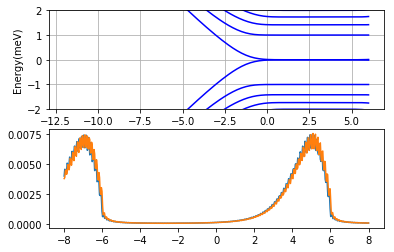

In [34]:
def wf_real_space(ev,k,x,Lx):
    Nx=len(k)
    kt=np.reshape(k,[1,Nx])
    xt=np.reshape(x,[len(x),1])
    return np.dot(np.exp(1j*kt*(xt)),ev[::2,:])/np.sqrt(2*Lx)*np.sqrt(x[1]-x[0]),\
        np.dot(np.exp(1j*kt*(xt)),ev[1::2,:])/np.sqrt(2*Lx)*np.sqrt(x[1]-x[0])

def plot_wf(i_band=Nx,iwf=int(3*len(ky_sw)/4)):
# iwf=0
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(ky_sw*lB,En.T/hwc,'b')
    plt.plot(ky_sw[iwf]*lB,En[i_band,iwf]/hwc,'ro')
    plt.ylabel("Energy(meV)")
    plt.xlabel("X(l)")
    plt.ylim(-2,2)
    # plt.xlim(-7.5,7.5)
    plt.grid()
#     plt.show()

    x0=np.linspace(-1,1,500)*8*lB
    wf1,wf2=wf_real_space(np.reshape(Vn[:,i_band,:],[2*Nx,len(ky_sw)]),kx,x0,Lx)
#     plt.figure()
    plt.subplot(2,1,2)
    plt.plot(x0/lB,np.abs(wf1[:,iwf])**2)
    plt.plot(x0/lB,np.abs(wf2[:,iwf])**2)
#     plt.title('ky=%.2f' % (ky_sw[iwf]*lB) )
    plt.show()
    
plot_wf(0,0)

In [7]:
interact(plot_wf,iwf=(0,len(ky_sw)-1,1), i_band=range(Nx-3,Nx+4));
#, continuous_update=False);

interactive(children=(Dropdown(description='i_band', index=3, options=(97, 98, 99, 100, 101, 102, 103), value=…

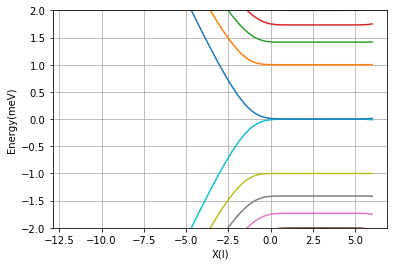

In [22]:
plt.figure()
# plt.plot(ky_sw/1e9,En.T/meV)
plt.plot(ky_sw*lB,En.T/hwc)
plt.ylabel("Energy(meV)")
# plt.xlabel("ky(1/nm)")
plt.xlabel("X(l)")
plt.ylim(-2,2)
# plt.xlim(-7.5,7.5)
plt.grid()
plt.show()

In [54]:
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)
lB=np.sqrt(hbar/(elec*B))

ky_sw=np.linspace(0,5,140)/lB

Lx=12*lB
Nx=100
kx=pi*np.arange(1,Nx+1)/Lx

# def y1(kx):
#     yval= np.zeros((len(kx),len(kx)))
#     for i1 in range(len(kx)):
#         k1= kx[i1]
#         for i2 in range(len(kx)):
#             k2= kx[i2]
#             if i1==i2:
#                 yval[i1,i1] = -(-1-2*k1**2*Lx**2 \
#                                  + np.cos(2*k1*Lx)\
#                                  +2*k1*Lx*np.sin(2*k1*Lx))/(8*k1**2 * Lx)
        
#             else:
#                 yval[i1,i2] = 1/(2*Lx)*(  (-1+np.cos((k1-k2)*Lx))/(k1-k2)**2 \
#                           + (1-np.cos((k1+k2)*Lx))/(k1+k2)**2 \
#                           + (Lx*np.sin((k1-k2)*Lx))/(k1-k2) \
#                           - (Lx*np.sin((k1+k2)*Lx))/(k1+k2) )        
#     return yval

# def y0(kx):
#     yval= np.zeros((len(kx),len(kx)))
#     for i1 in range(len(kx)):
#         k1= kx[i1]
#         for i2 in range(len(kx)):
#             k2= kx[i2]
#             if i1==i2:
#                 yval[i1,i1] = (Lx/2-np.sin(2*k1*Lx)/(4*k1))/Lx    
#             else:
#                 yval[i1,i2] = (-k1*np.cos(k1*Lx)*np.sin(k2*Lx)+k2*np.cos(k2*Lx)*np.sin(k1*Lx))/(k1**2-k2**2)/Lx
#     return yval

def y2(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c= (2*k*np.cos(k*Ld)+(-2+k**2 * Ld**2)*np.sin(k*Ld))/ (k**3) /Lx
        c[ ~ np.isfinite( c )] = Ld**3 /(3*Lx)
    return c

def y1(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = 1j*(-k*Ld*np.cos(k*Ld)+np.sin(k*Ld))/ (k**2) /Lx
        c[ ~ np.isfinite( c )] = Ld**2/(2*Lx)
    return c

def y0(k):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.sin(k*Ld)/(k*Lx)
        c[ ~ np.isfinite( c )] = Ld/Lx
    return c


sigma0=np.array([[1,0],[0,1]])
sigma1=np.array([[0,1],[1,0]])
sigma2=np.array([[0,-1j],[1j,0]])
sigma3=np.array([[1,0],[0,-1]])

HeB= vF*elec*B* np.kron( y1(kx), sigma1)
Hxd= hbar*vF*np.kron(np.diag(kx) , sigma2)

En=np.zeros((2*Nx,len(ky_sw)))
Vn=np.zeros((2*Nx,2*Nx,len(ky_sw)), dtype=np.complex64)
for i_y in range(len(ky_sw)):
    ky=ky_sw[i_y]
#     Hyd= np.kron(hbar*vF*ky*y0(k1-k2), sigma1)
    Hyd= np.kron(hbar*vF*ky*np.eye(Nx), sigma1)


    H_t = Hxd + (Hyd + HeB)
#     H_t = Hxq + Hyq + Hxd + (Hyd + HeB + np.transpose(HeB).conj())
#     H_t = Hx + Hy + HeB + np.transpose(HeB).conj()
#     H1T=Hx+Hy+(HeB2T+HeB1T+HefT).conj()
#     Hd_mat=np.kron(np.array([[0.,1.0],[0.,0.]]),Hd)
#     H_t=block_diag(H1,-H1T)+Hd_mat+np.transpose(Hd_mat).conj()
    En[:,i_y], Vn[:,:,i_y] =np.linalg.eigh(H_t)
    
print("Done!")

Done!


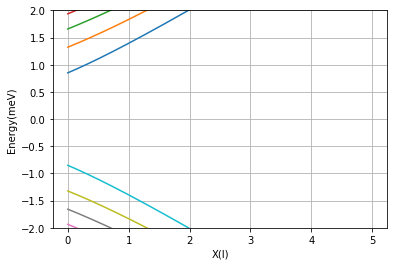

In [55]:
plt.figure()
plt.plot(ky_sw*lB,En.T/hwc)
plt.ylabel("Energy(meV)")
# plt.xlabel("ky(1/nm)")
plt.xlabel("X(l)")
plt.ylim(-2,2)
# plt.xlim(-7.5,7.5)
plt.grid()
plt.show()